# Regresión Lineal y correlacion

- Aprendizaje Supervisado: El algoritmo va a recibir un conjunto de datos etiquetado.
- Aprendizaje basado en Modelos: Va a construir un modelo que utilizará para realizar predicciones.
- Se corresponde con un modelo lineal: Va a construir una función hipótesis, que se va a corresponder con una función
lineal: 𝑦 = 𝑤. 𝑥 +b

Realiza predicciones computando una suma ponderada de las características
de entrada: 𝑦 = 𝑤1. 𝑥1 + 𝑤2. 𝑥2 + 𝑤3. 𝑥3 + ⋯ + 𝑏
Va a predecir valores continuos

## importación de librerias y funciones auxiliares

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:

def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

def plot_multi_scatter_and_regression_optional(X_e, y_e, n_cols=3, show_regression=False):
    """
    Genera múltiples gráficos de dispersión mostrando la relación de cada
    variable en X_e contra el target y_e. Opcionalmente, incluye la recta
    de regresión lineal simple y su métrica R² para cada par.

    Args:
        X_e (pd.DataFrame): DataFrame con las variables predictoras (X).
        y_e (pd.Series or np.array): Serie o array con la variable objetivo (Y).
        n_cols (int): Número de gráficos por fila. Por defecto es 3.
        show_regression (bool): Si es True, muestra la recta de regresión univariada
                                y el coeficiente R². Por defecto es True.
    """

    if X_e.empty:
        print("El DataFrame de variables predictoras (X_e) está vacío.")
        return

    n_features = len(X_e.columns)
    n_rows = (n_features + n_cols - 1) // n_cols

    # Calcula el tamaño de la figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    # Itera sobre cada columna de X_e
    for i, col in enumerate(X_e.columns):
        ax = axes[i]

        # 1. Gráfico de Dispersión
        ax.scatter(X_e[col], y_e, color='blue', alpha=0.6, label='Datos')

        # 2. Lógica Condicional para la Regresión
        if show_regression:
            # Aísla la variable X actual y la reformatea para Scikit-learn (necesita 2D)
            # Utilizamos .to_frame() si col es una Series, para asegurar el formato (N, 1)
            X_uni = X_e[[col]]

            # Crea y entrena un modelo de regresión lineal (univariado)
            modelo_uni = LinearRegression()
            modelo_uni.fit(X_uni, y_e)

            # Genera los valores predichos (la recta)
            y_pred_uni = modelo_uni.predict(X_uni)

            # Trazar la recta de regresión
            ax.plot(
                X_e[col],
                y_pred_uni,
                color='red',
                label=f'Recta Regresión (R²={modelo_uni.score(X_uni, y_e):.2f})'
            )

        # Configuración del Subplot
        ax.set_title(f'Relación: {col} vs Precio Dolar')
        ax.set_xlabel(col)
        ax.set_ylabel('Dolar (y_e)')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)


    # Oculta subplots vacíos
    for j in range(n_features, len(axes)):
        fig.delaxes(axes[j])

    # Título general y ajuste del layout
    plt.suptitle('Gráficos de Dispersión por Variable', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 1.01])
    plt.show()


## Importación de dataset

Importamos el archivo y revisamos la información que contiene

In [23]:
df=pd.read_csv("tp_datos_cruzados.csv")
df.head(5)

,indice_tiempo,canasta_basica_alimentaria,inversa_coeficiente_engel,canasta_basica_total,linea_indigencia,linea_pobreza,precio_aceite_girasol_1.5l,dolar
0,2017-07,1984.64,2.45,4862.37,6132.54,15024.72,51.35,17.170226
1,2017-08,2021.98,2.44,4933.63,6247.92,15244.92,52.35,17.430000
2,2017-09,2049.39,2.44,5000.51,6332.62,15451.58,54.09,17.222933
3,2017-10,2079.23,2.44,5073.32,6424.82,15676.56,54.68,17.452290
4,2017-11,2125.84,2.44,5187.05,6568.85,16027.98,55.11,17.486933


In [24]:
df.isnull().sum()

,0
indice_tiempo,0
canasta_basica_alimentaria,0
inversa_coeficiente_engel,0
canasta_basica_total,0
linea_indigencia,0
linea_pobreza,0
precio_aceite_girasol_1.5l,0
dolar,0


Para seguir trabajando se eliminará la columna de indice_tiempo

In [25]:
df.drop(columns=["indice_tiempo"], axis=1, inplace=True)
df

,canasta_basica_alimentaria,inversa_coeficiente_engel,canasta_basica_total,linea_indigencia,linea_pobreza,precio_aceite_girasol_1.5l,dolar
0,1984.64,2.45,4862.37,6132.54,15024.72,51.35,17.170226
1,2021.98,2.44,4933.63,6247.92,15244.92,52.35,17.430000
2,2049.39,2.44,5000.51,6332.62,15451.58,54.09,17.222933
3,2079.23,2.44,5073.32,6424.82,15676.56,54.68,17.452290
4,2125.84,2.44,5187.05,6568.85,16027.98,55.11,17.486933
...,...,...,...,...,...,...,...
94,161903.21,2.22,359425.13,500280.92,1110623.65,4179.49,1150.064516
95,163756.66,2.23,365177.35,506008.08,1128398.01,4367.87,1179.400000
96,166797.70,2.23,371958.87,515404.89,1149352.91,4449.60,1268.016129
97,168456.04,2.23,375656.97,520529.16,1160780.04,4527.37,1328.064516


## Trabajamos con multiples variables
 X_e tiene 6 variables para ser analizadas

### Separación de variables

Se va a definir la variable dependiente(y_e) e independiente(X_e)

In [26]:
X_e = df.iloc[:,:-1]
y_e = df.iloc[:,[6]]

In [27]:
X_e

,canasta_basica_alimentaria,inversa_coeficiente_engel,canasta_basica_total,linea_indigencia,linea_pobreza,precio_aceite_girasol_1.5l
0,1984.64,2.45,4862.37,6132.54,15024.72,51.35
1,2021.98,2.44,4933.63,6247.92,15244.92,52.35
2,2049.39,2.44,5000.51,6332.62,15451.58,54.09
3,2079.23,2.44,5073.32,6424.82,15676.56,54.68
4,2125.84,2.44,5187.05,6568.85,16027.98,55.11
...,...,...,...,...,...,...
94,161903.21,2.22,359425.13,500280.92,1110623.65,4179.49
95,163756.66,2.23,365177.35,506008.08,1128398.01,4367.87
96,166797.70,2.23,371958.87,515404.89,1149352.91,4449.60
97,168456.04,2.23,375656.97,520529.16,1160780.04,4527.37


Variable target, esta es la variable a predecir

In [28]:
y_e

,dolar
0,17.170226
1,17.430000
2,17.222933
3,17.452290
4,17.486933
...,...
94,1150.064516
95,1179.400000
96,1268.016129
97,1328.064516


### Relación con el target "Precio dolar"
Se procede a analizar visualmente utilizando el diagrama de dispersión para ver como interactuan entre las distintas variables.

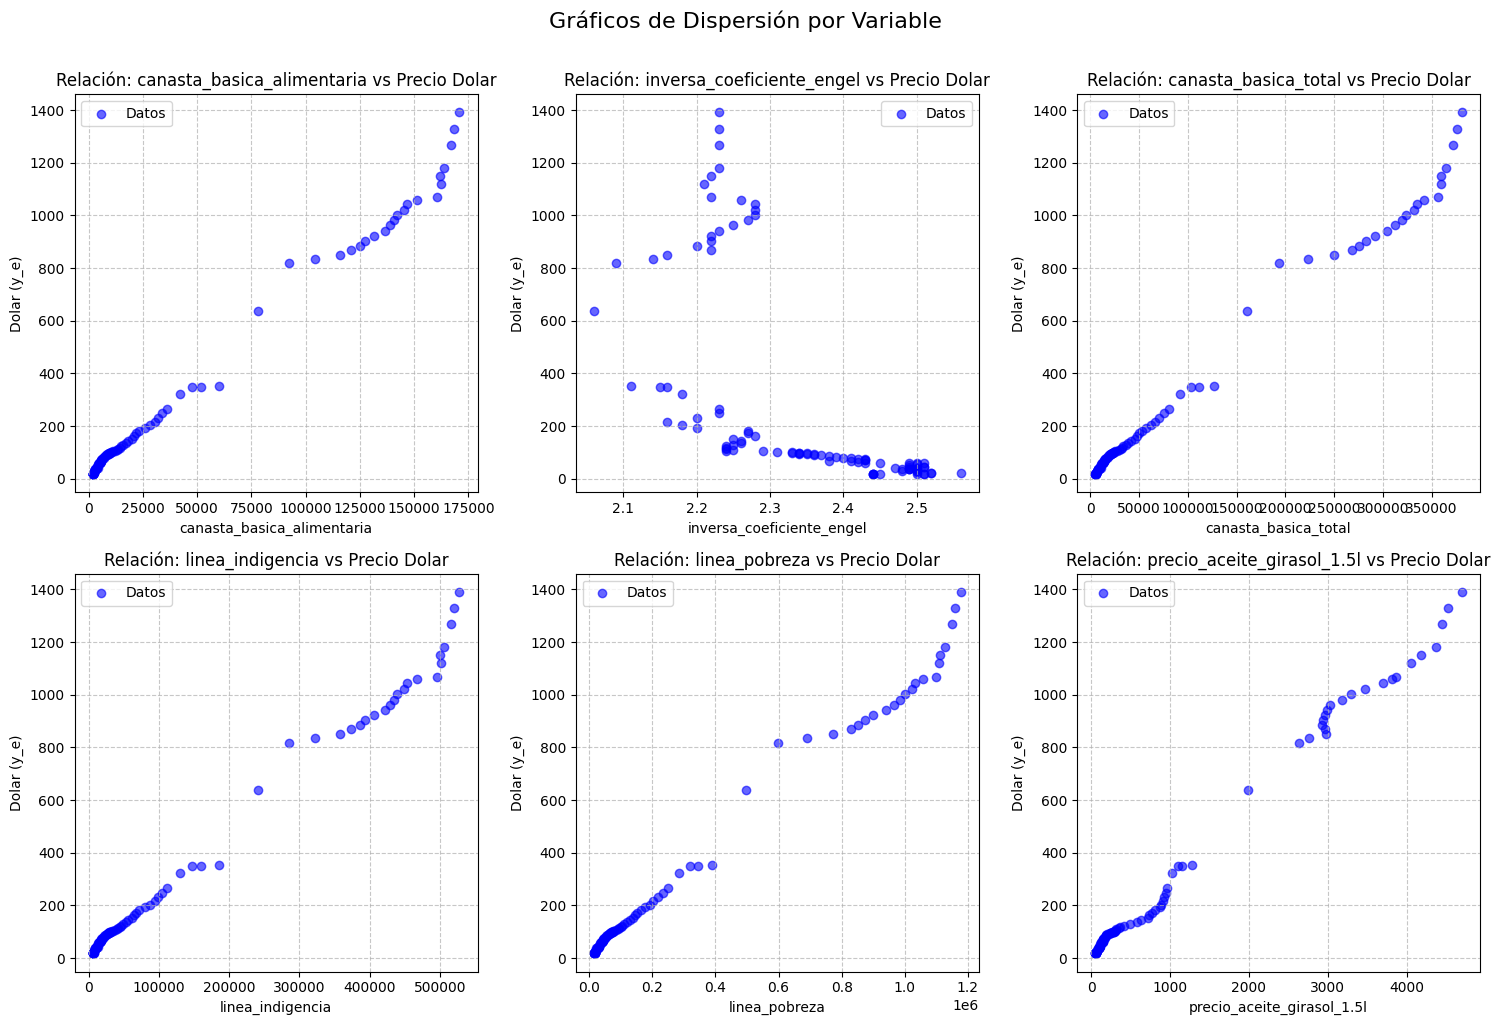

In [29]:
plot_multi_scatter_and_regression_optional(X_e, y_e)

Se puede apreciar que la mayoría de los gráficos de dispersión los puntos poseen distrbución similar.

## Correlación: Mapa de calor
Con el diagrama de mapa de calor se analiza las distintas correlaciones que hay entre las variables. Se puede pareciar que cuando más cercano a uno se encuentre significa que la correlación es alta. A medida que uno crece crece la otra variable. En el caso de las correlaciones negativas significa que a medida que crece uno la otra variable decrece.

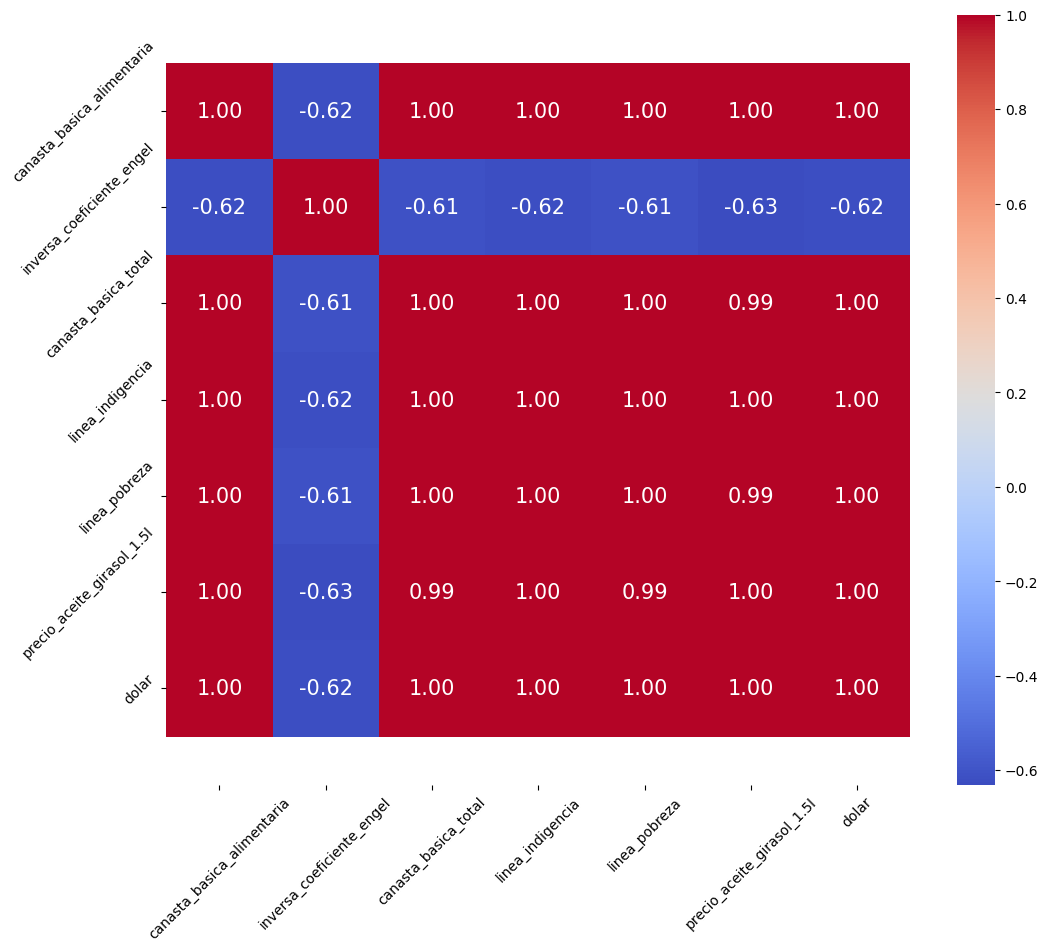

In [30]:
corr = df.corr()
plot_corre_heatmap(corr)

## Selección de variable independiente
Luego de analizar los resultados obtenidos se procederá a seguir con la regresión lineal de las variabes dolar y precio_aceite_girasol_1.5l

In [41]:
X_ind = X_e.iloc[:,[5]]
X_ind

,precio_aceite_girasol_1.5l
0,51.35
1,52.35
2,54.09
3,54.68
4,55.11
...,...
94,4179.49
95,4367.87
96,4449.60
97,4527.37


### Búsqueda de la función de la regresíon
Utilizaremos X_e - y_e para encontrar la recta que pasa por los puntos

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_ind, y_e)
score=lin_reg.score(X_ind, y_e)
score

0.9936878315208436

### Parámetros de la funcion predictora

In [43]:
coeficientes = lin_reg.coef_
intercepto = lin_reg.intercept_
print(f"Intercepto (Beta_0): {intercepto}")

print(f"Coeficientes (Betas): {coeficientes}")

Coeficientes (Betas): [[0.28726751]]


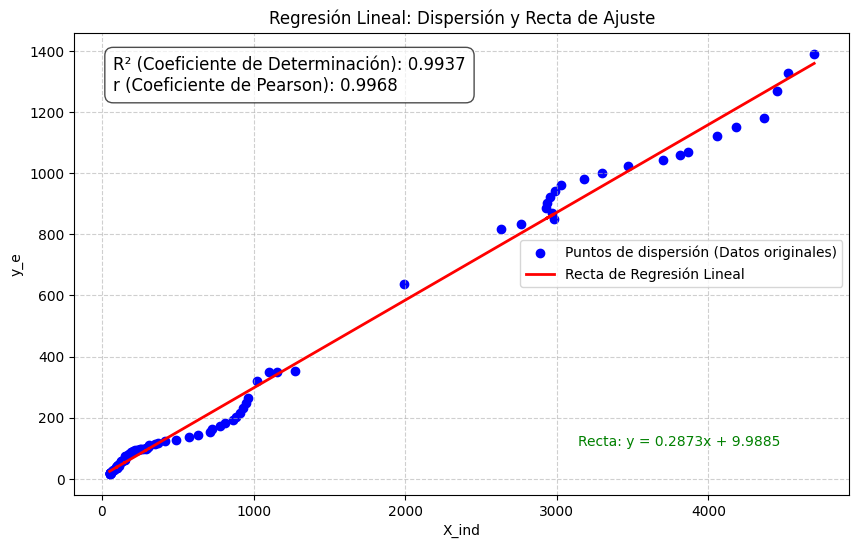


--- Resultados del Modelo ---
R² (Coeficiente de Determinación): 0.9937
Coeficiente de Pearson (r): 0.9968
Ecuación de la Recta: y = 0.28726751173840365x + 9.9885


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Supongamos que X_ind y y_e son tus datos (ejemplo de datos unidimensionales):
# Si X_ind es 2D (como se espera para .fit), asegúrate de usar la primera columna para graficar.
# Para este ejemplo, asumiremos X_ind es 2D pero con una sola característica:
# X_ind = np.array([[1], [2], [3], [4], [5]])
# y_e = np.array([2.1, 3.9, 6.2, 8.1, 9.8])

# --- El código que ya tienes ---
lin_reg = LinearRegression()
lin_reg.fit(X_ind, y_e)
score = lin_reg.score(X_ind, y_e) # Este es el coeficiente R^2
coeficientes = lin_reg.coef_
intercepto = lin_reg.intercept_

# --- Parte nueva para la visualización y Pearson ---

# 1. Preparar datos para la recta de regresión
# Generar predicciones (y_pred) usando la ecuación de la recta: y = mx + b
# Necesitas la versión 1D de X_ind para la mayoría de los gráficos y cálculos de Pearson
X_plot = X_ind.iloc[:, 0].values
y_pred = lin_reg.predict(X_ind)
y_plot = y_e.values.flatten()


# 2. Calcular Coeficiente de Pearson (r)
# pearsonr devuelve (coeficiente_r, p-valor)
coef_pearson, p_valor = pearsonr(X_plot, y_plot)

# 3. Creación del Gráfico
plt.figure(figsize=(10, 6))

# A. Puntos de dispersión
plt.scatter(X_plot, y_e, color='blue', label='Puntos de dispersión (Datos originales)')

# B. Recta de Regresión Lineal
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Recta de Regresión Lineal')

# C. Mostrar Métricas (R^2 y Pearson)
# Construir la cadena de texto para la leyenda o anotación
text_info = f'R² (Coeficiente de Determinación): {score:.4f}\n'
text_info += f'r (Coeficiente de Pearson): {coef_pearson:.4f}'

plt.title('Regresión Lineal: Dispersión y Recta de Ajuste')
plt.xlabel('X_ind')
plt.ylabel('y_e')
plt.legend() # Muestra las etiquetas de los puntos y la recta

# Anotar las métricas en una esquina del gráfico para mejor visibilidad
plt.text(0.05, 0.95, text_info, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))

m = coeficientes[0].item()  # Extrae el coeficiente (la pendiente)
b = intercepto.item()

ecuacion = f'Recta: y = {m:.4f}x + {b:.4f}'

# Mostrar la ecuación de la recta (opcional, pero útil)
plt.text(0.65, 0.1, ecuacion, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', color='green')


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Resultados del Modelo ---")
print(f"R² (Coeficiente de Determinación): {score:.4f}")
print(f"Coeficiente de Pearson (r): {coef_pearson:.4f}")
print(f"Ecuación de la Recta: y = {m}x + {b:.4f}")


Este ejercicio sirve como ejemplo para demostrar la aplicación de regresión lineal y correlación.